In [75]:
import numpy as np
import pandas as pd
from pandas import Series
import matplotlib.pyplot as plt
import random
%matplotlib inline

In [76]:
item_category_df = pd.read_csv("data/item_categories.csv")
items_df = pd.read_csv("data/items.csv")
shops_df = pd.read_csv("data/shops.csv")
sample_df = pd.read_csv("data/sample_submission.csv")
train_df = pd.read_csv("data/sales_train_v2.csv")
test_df = pd.read_csv("data/test.csv")

In [77]:
train_e = train_df
train_e

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0
5,10.01.2013,0,25,2564,349.00,1.0
6,02.01.2013,0,25,2565,549.00,1.0
7,04.01.2013,0,25,2572,239.00,1.0
8,11.01.2013,0,25,2572,299.00,1.0
9,03.01.2013,0,25,2573,299.00,3.0


In [78]:
f = lambda x: x.split(".")
train_e['date_test'] =list(map(f, train_e['date']))

In [79]:
f = lambda x: x[1]
train_e['month'] =list(map(f, train_e['date']))
f = lambda x: x[2]+"."+x[1]
train_df['date_test'] =list(map(f, train_df['date_test']))
train_df['date_test'].head()

0    2013.01
1    2013.01
2    2013.01
3    2013.01
4    2013.01
Name: date_test, dtype: object

In [80]:
train_e = train_e.drop(['date'],axis=1)

In [81]:
train_e

,date_block_num,shop_id,item_id,item_price,item_cnt_day,date_test,month
0,0,59,22154,999.00,1.0,2013.01,2
1,0,25,2552,899.00,1.0,2013.01,3
2,0,25,2552,899.00,-1.0,2013.01,5
3,0,25,2554,1709.05,1.0,2013.01,6
4,0,25,2555,1099.00,1.0,2013.01,5
5,0,25,2564,349.00,1.0,2013.01,0
6,0,25,2565,549.00,1.0,2013.01,2
7,0,25,2572,239.00,1.0,2013.01,4
8,0,25,2572,299.00,1.0,2013.01,1
9,0,25,2573,299.00,3.0,2013.01,3


In [82]:
test = train_e["item_cnt_day"].as_matrix()
condition = test>100
test[condition]

array([ 200.,  107.,  150.,  217.,  104.,  168.,  156.,  264.,  110.,
        133.,  148.,  106.,  109.,  102.,  288.,  171.,  131.,  151.,
        113.,  118.,  127.,  168.,  135.,  103.,  111.,  242.,  105.,
        104.,  126.,  101.,  194.,  255.,  121.,  405.,  300.,  401.,
        502.,  138.,  134.,  133.,  240.,  171.,  130.,  115.,  104.,
        164.,  112.,  501.,  151.,  103.,  251.,  103.,  101.,  124.,
        149.,  132.,  195.,  512.,  124.,  151.,  401.,  508.,  130.,
        101.,  412.,  313.,  106.,  128.,  142.,  163.,  108.,  147.,
        167.,  142.,  107.,  500.,  205.,  153., 1000.,  222.,  124.,
        110.,  110.,  110.,  116.,  115.,  313.,  325.,  127.,  171.,
        207.,  121.,  111.,  129.,  231.,  114.,  116.,  103.,  299.,
        138.,  145.,  117.,  624.,  108.,  104.,  148.,  134.,  110.,
        187.,  140.,  480.,  343.,  539.,  205.,  117.,  106.,  230.,
        179.,  151.,  150.,  121.,  126.,  145.,  154.,  533.,  139.,
        637.,  151.,

In [83]:
test = train_e["item_cnt_day"].as_matrix()
test = np.where(test>10)
test = test[0]
test

array([    352,     404,    5410, ..., 2935757, 2935758, 2935766],
      dtype=int64)

In [84]:
train_df["item_cnt_day"].where(train_df["item_cnt_day"] >10)

0         NaN
1         NaN
2         NaN
3         NaN
4         NaN
5         NaN
6         NaN
7         NaN
8         NaN
9         NaN
10        NaN
11        NaN
12        NaN
13        NaN
14        NaN
15        NaN
16        NaN
17        NaN
18        NaN
19        NaN
20        NaN
21        NaN
22        NaN
23        NaN
24        NaN
25        NaN
26        NaN
27        NaN
28        NaN
29        NaN
           ..
2935819   NaN
2935820   NaN
2935821   NaN
2935822   NaN
2935823   NaN
2935824   NaN
2935825   NaN
2935826   NaN
2935827   NaN
2935828   NaN
2935829   NaN
2935830   NaN
2935831   NaN
2935832   NaN
2935833   NaN
2935834   NaN
2935835   NaN
2935836   NaN
2935837   NaN
2935838   NaN
2935839   NaN
2935840   NaN
2935841   NaN
2935842   NaN
2935843   NaN
2935844   NaN
2935845   NaN
2935846   NaN
2935847   NaN
2935848   NaN
Name: item_cnt_day, Length: 2935849, dtype: float64

In [85]:
more_than_ten = train_df["item_cnt_day"].where(train_df["item_cnt_day"] >10)
more_than_ten.dropna(how='all')

352        13.0
404        13.0
5410       11.0
8547       30.0
9348       22.0
9371       14.0
10172      15.0
17422      12.0
18924      14.0
19427      15.0
19428      12.0
21467      15.0
22210      11.0
22226      13.0
22227      11.0
22228      15.0
22254      17.0
22255      12.0
27418      12.0
27419      13.0
27824      11.0
36515      19.0
41681      13.0
41763      11.0
45542      11.0
58351      11.0
58712      11.0
59104      20.0
61054      11.0
61055      15.0
           ... 
2928468    17.0
2928469    14.0
2928472    12.0
2928474    15.0
2928739    19.0
2928813    12.0
2929500    15.0
2929535    20.0
2929537    12.0
2929958    13.0
2929959    14.0
2929960    28.0
2929971    17.0
2929979    11.0
2930488    20.0
2931027    33.0
2931108    13.0
2931869    15.0
2932159    12.0
2934812    11.0
2935102    13.0
2935298    20.0
2935362    79.0
2935363    26.0
2935364    17.0
2935377    34.0
2935379    15.0
2935757    47.0
2935758    15.0
2935766    35.0
Name: item_cnt_day, Leng

In [86]:
below_ten = train_df["item_cnt_day"].where(train_df["item_cnt_day"] <0)
below_ten.dropna(how='all')

2         -1.0
148       -1.0
175       -1.0
807       -1.0
1041      -1.0
1193      -1.0
1674      -1.0
1825      -1.0
2411      -1.0
3216      -1.0
3386      -1.0
3447      -1.0
3492      -1.0
3532      -1.0
3743      -1.0
4309      -1.0
4675      -1.0
4811      -1.0
4927      -1.0
4950      -1.0
5108      -1.0
5505      -1.0
6251      -1.0
7139      -1.0
7174      -1.0
7277      -1.0
7576      -1.0
7666      -1.0
7720      -1.0
7894      -1.0
          ... 
2921035   -1.0
2921261   -1.0
2921586   -1.0
2922502   -1.0
2923221   -1.0
2923357   -1.0
2923403   -1.0
2923865   -1.0
2924293   -1.0
2924406   -1.0
2924442   -1.0
2926713   -1.0
2926793   -1.0
2926839   -1.0
2928586   -1.0
2929224   -1.0
2929946   -1.0
2930269   -1.0
2931176   -1.0
2932364   -1.0
2932589   -1.0
2932636   -1.0
2932721   -1.0
2933448   -1.0
2933712   -1.0
2934243   -1.0
2934462   -1.0
2935263   -1.0
2935643   -1.0
2935779   -1.0
Name: item_cnt_day, Length: 7356, dtype: float64

In [87]:
more_than_ten.size

2935849

In [88]:
below_ten.size

2935849

In [89]:
more_than_ten.unique()

array([  nan,   13.,   11.,   30.,   22.,   14.,   15.,   12.,   17.,
         19.,   20.,   16.,   64.,   18.,   29.,   26.,   39.,   21.,
         27.,   53.,   25.,   23.,   24.,   40.,   28.,   31.,   36.,
         32.,   35.,   41.,   88.,   44.,   52.,   56.,   38.,   34.,
         57.,   69.,   37.,   47.,   50.,   48.,   33.,   61.,   80.,
         42.,   82.,  200.,  100.,   76.,   77.,  107.,   46.,   49.,
         70.,   55.,   60.,   45.,   71.,   65.,  150.,   85.,   89.,
         43.,   58.,  217.,  104.,   84.,  168.,   92.,  156.,   68.,
         62.,  264.,  110.,   83.,  133.,   51.,  148.,   54.,   67.,
        106.,  109.,  102.,   90.,  288.,  171.,  131.,   87.,   78.,
        151.,   59.,  113.,  118.,  127.,   97.,  135.,  103.,  111.,
         96.,  242.,  105.,   72.,  126.,   73.,  101.,   91.,   63.,
        194.,  255.,   98.,   81.,   75.,   74.,  121.,  405.,   99.,
        300.,  401.,  502.,  138.,  134.,   66.,  240.,  130.,  115.,
        164.,  112.,

In [90]:
below_ten.unique()

array([ nan,  -1.,  -5.,  -6.,  -3.,  -2.,  -4., -22., -16.,  -9.])

## 여기서부터 다시! New Idea for 이상치 처리

In [91]:
df = train_e
df.head()

,date_block_num,shop_id,item_id,item_price,item_cnt_day,date_test,month
0,0,59,22154,999.00,1.0,2013.01,2
1,0,25,2552,899.00,1.0,2013.01,3
2,0,25,2552,899.00,-1.0,2013.01,5
3,0,25,2554,1709.05,1.0,2013.01,6
4,0,25,2555,1099.00,1.0,2013.01,5


In [92]:
set(df["item_cnt_day"])

{-22.0,
 -16.0,
 -9.0,
 -6.0,
 -5.0,
 -4.0,
 -3.0,
 -2.0,
 -1.0,
 1.0,
 2.0,
 3.0,
 4.0,
 5.0,
 6.0,
 7.0,
 8.0,
 9.0,
 10.0,
 11.0,
 12.0,
 13.0,
 14.0,
 15.0,
 16.0,
 17.0,
 18.0,
 19.0,
 20.0,
 21.0,
 22.0,
 23.0,
 24.0,
 25.0,
 26.0,
 27.0,
 28.0,
 29.0,
 30.0,
 31.0,
 32.0,
 33.0,
 34.0,
 35.0,
 36.0,
 37.0,
 38.0,
 39.0,
 40.0,
 41.0,
 42.0,
 43.0,
 44.0,
 45.0,
 46.0,
 47.0,
 48.0,
 49.0,
 50.0,
 51.0,
 52.0,
 53.0,
 54.0,
 55.0,
 56.0,
 57.0,
 58.0,
 59.0,
 60.0,
 61.0,
 62.0,
 63.0,
 64.0,
 65.0,
 66.0,
 67.0,
 68.0,
 69.0,
 70.0,
 71.0,
 72.0,
 73.0,
 74.0,
 75.0,
 76.0,
 77.0,
 78.0,
 79.0,
 80.0,
 81.0,
 82.0,
 83.0,
 84.0,
 85.0,
 86.0,
 87.0,
 88.0,
 89.0,
 90.0,
 91.0,
 92.0,
 93.0,
 95.0,
 96.0,
 97.0,
 98.0,
 99.0,
 100.0,
 101.0,
 102.0,
 103.0,
 104.0,
 105.0,
 106.0,
 107.0,
 108.0,
 109.0,
 110.0,
 111.0,
 112.0,
 113.0,
 114.0,
 115.0,
 116.0,
 117.0,
 118.0,
 121.0,
 124.0,
 126.0,
 127.0,
 128.0,
 129.0,
 130.0,
 131.0,
 132.0,
 133.0,
 134.0,
 135.0,
 138.0,
 1

In [93]:
# df_icd = np.sort(df["item_cnt_day"].unique())
# df_icd

In [94]:
grouped = df.groupby("item_cnt_day")
for name, group in grouped:
    print(name)
    print(group)

-22.0
         date_block_num  shop_id  item_id  item_price  item_cnt_day date_test  \
1057907              10       12     8023        15.0         -22.0   2013.11   

        month  
1057907     2  
-16.0
         date_block_num  shop_id  item_id  item_price  item_cnt_day date_test  \
1835454              18       14    20949         5.0         -16.0   2014.07   

        month  
1835454     0  
-9.0
         date_block_num  shop_id  item_id   item_price  item_cnt_day  \
2048519              21       12     9242  1433.333333          -9.0   

        date_test month  
2048519   2014.10     0  
-6.0
        date_block_num  shop_id  item_id  item_price  item_cnt_day date_test  \
59156                0       12     1590      2599.0          -6.0   2013.01   
940092               9       42     3732      2599.0          -6.0   2013.10   

       month  
59156      8  
940092     9  
-5.0
         date_block_num  shop_id  item_id  item_price  item_cnt_day date_test  \
59155              

[1820 rows x 7 columns]
11.0
         date_block_num  shop_id  item_id    item_price  item_cnt_day  \
5410                  0       25    16450    399.000000          11.0   
22210                 0       28    16450    399.000000          11.0   
22227                 0       28    16450    399.000000          11.0   
27824                 0       27    14612    179.000000          11.0   
41763                 0        1    13345     13.000000          11.0   
45542                 0       16     2972    599.000000          11.0   
58351                 0       12    11365    781.818182          11.0   
58712                 0       12    15438    599.000000          11.0   
61054                 0       31     2972    599.000000          11.0   
68369                 0       31    19811    349.000000          11.0   
68374                 0       31    19811    339.436364          11.0   
68593                 0       31    22092    108.770000          11.0   
72138                 

         date_block_num  shop_id  item_id   item_price  item_cnt_day  \
93105                 0       42    13598    10.000000          26.0   
126400                1       43     2749  1045.153846          26.0   
161893                1       22     4827  2095.153846          26.0   
170737                1        6     2445  1198.980769          26.0   
239029                2       31     6739  2981.692308          26.0   
270287                2       43     6739  2999.000000          26.0   
301565                2       15     6738   699.000000          26.0   
301860                2       12     6739  2999.000000          26.0   
341387                2       57     6738   699.000000          26.0   
450101                4       28    20949     5.000000          26.0   
484520                4       31    20949     5.000000          26.0   
540955                5       29     2808   999.000000          26.0   
543545                5       28    20949     5.000000          

         date_block_num  shop_id  item_id    item_price  item_cnt_day  \
484519                4       31    20949      5.000000          42.0   
504416                4       54    20949      5.000000          42.0   
777795                7       31    20949      5.000000          42.0   
890343                8       31     2808    999.000000          42.0   
891209                8       31     3331   1199.000000          42.0   
903285                8       28     3732   2591.857143          42.0   
903587                8       28     2808    999.000000          42.0   
1033664              10       28    20949      5.000000          42.0   
1043507              10       35     6675  18251.904762          42.0   
1046133              10       31    20949      5.000000          42.0   
1046148              10       31    20949      5.000000          42.0   
1050747              10       31     4231   2799.000000          42.0   
1153205              11       27    20949      5.00

2709994     4  
71.0
         date_block_num  shop_id  item_id   item_price  item_cnt_day  \
794510                7       25     2808   999.000000          71.0   
856151                8       21     3732  2529.704225          71.0   
1590180              15       19     2814   874.281690          71.0   
2373831              24       28    20949     5.000000          71.0   
2602462              27        2     3731  1929.985915          71.0   
2865671              32       12    15067  5499.000000          71.0   

        date_test month  
794510    2013.08     9  
856151    2013.09     7  
1590180   2014.04     5  
2373831   2015.01     2  
2602462   2015.04     4  
2865671   2015.09     9  
72.0
         date_block_num  shop_id  item_id   item_price  item_cnt_day  \
1058428              10       12     1502  2440.236111          72.0   
1250834              11       42    20949     5.000000          72.0   
1385941              13       31    20949     5.000000          72.0   

         date_block_num  shop_id  item_id  item_price  item_cnt_day date_test  \
1058343              10       12    11373        72.2         105.0   2013.11   

        month  
1058343     9  
106.0
         date_block_num  shop_id  item_id   item_price  item_cnt_day  \
884437                8       12     3732  2494.754717         106.0   
2137663              22       55     3025  1799.000000         106.0   
2628859              28       31    10210  3496.169811         106.0   

        date_test month  
884437    2013.09     7  
2137663   2014.11     1  
2628859   2015.05     9  
107.0
         date_block_num  shop_id  item_id   item_price  item_cnt_day  \
620237                5       42    16787  2559.746729         107.0   
2237669              23       31    20949     5.000000         107.0   

        date_test month  
620237    2013.06     4  
2237669   2014.12     0  
108.0
         date_block_num  shop_id  item_id  item_price  item_cnt_day date_test  \
2144548           

2325698     2  
154.0
         date_block_num  shop_id  item_id   item_price  item_cnt_day  \
2851032              32       55     9245  1306.493506         154.0   

        date_test month  
2851032   2015.09     0  
156.0
        date_block_num  shop_id  item_id  item_price  item_cnt_day date_test  \
858692               8       18     3732      2534.0         156.0   2013.09   

       month  
858692     8  
157.0
         date_block_num  shop_id  item_id   item_price  item_cnt_day  \
2864259              32       12     9252  1497.452229         157.0   

        date_test month  
2864259   2015.09     0  
161.0
         date_block_num  shop_id  item_id   item_price  item_cnt_day  \
2864264              32       12     9244  1296.273292         161.0   

        date_test month  
2864264   2015.09     0  
163.0
         date_block_num  shop_id  item_id  item_price  item_cnt_day date_test  \
2144509              22       12    11370  236.196319         163.0   2014.11   

        m

2864260     9  
508.0
         date_block_num  shop_id  item_id  item_price  item_cnt_day date_test  \
2067669              21       55    19437       899.0         508.0   2014.10   

        month  
2067669     9  
512.0
         date_block_num  shop_id  item_id  item_price  item_cnt_day date_test  \
2048518              21       12     9242      1500.0         512.0   2014.10   

        month  
2048518     2  
533.0
         date_block_num  shop_id  item_id  item_price  item_cnt_day date_test  \
2851073              32       55     9249      1500.0         533.0   2015.09   

        month  
2851073     9  
539.0
         date_block_num  shop_id  item_id  item_price  item_cnt_day date_test  \
2626181              28       12    11373   155.19295         539.0   2015.05   

        month  
2626181     9  
624.0
         date_block_num  shop_id  item_id   item_price  item_cnt_day  \
2608040              27       12     3731  1904.548077         624.0   

        date_test month  
260

In [95]:
df = train_df["item_cnt_day"].where(train_df["item_cnt_day"] <0)
below_ten.dropna(how='all')

2         -1.0
148       -1.0
175       -1.0
807       -1.0
1041      -1.0
1193      -1.0
1674      -1.0
1825      -1.0
2411      -1.0
3216      -1.0
3386      -1.0
3447      -1.0
3492      -1.0
3532      -1.0
3743      -1.0
4309      -1.0
4675      -1.0
4811      -1.0
4927      -1.0
4950      -1.0
5108      -1.0
5505      -1.0
6251      -1.0
7139      -1.0
7174      -1.0
7277      -1.0
7576      -1.0
7666      -1.0
7720      -1.0
7894      -1.0
          ... 
2921035   -1.0
2921261   -1.0
2921586   -1.0
2922502   -1.0
2923221   -1.0
2923357   -1.0
2923403   -1.0
2923865   -1.0
2924293   -1.0
2924406   -1.0
2924442   -1.0
2926713   -1.0
2926793   -1.0
2926839   -1.0
2928586   -1.0
2929224   -1.0
2929946   -1.0
2930269   -1.0
2931176   -1.0
2932364   -1.0
2932589   -1.0
2932636   -1.0
2932721   -1.0
2933448   -1.0
2933712   -1.0
2934243   -1.0
2934462   -1.0
2935263   -1.0
2935643   -1.0
2935779   -1.0
Name: item_cnt_day, Length: 7356, dtype: float64

### item_cnt_day 각 항목들에 대해 Dataframe에 partician을 취함

In [96]:
df_pt_m22 = grouped.get_group(df_icd[0])
df_pt_m16 = grouped.get_group(df_icd[1])
df_pt_m9 = grouped.get_group(df_icd[2])
df_pt_m6 = grouped.get_group(df_icd[3])
df_pt_m5 = grouped.get_group(df_icd[4])
df_pt_m4 = grouped.get_group(df_icd[5])
df_pt_m3 = grouped.get_group(df_icd[6])
df_pt_m2 = grouped.get_group(df_icd[7])
df_pt_m1 = grouped.get_group(df_icd[8])
df_pt_1 = grouped.get_group(df_icd[9])
df_pt_2 = grouped.get_group(df_icd[10])
df_pt_3 = grouped.get_group(df_icd[11])
df_pt_4 = grouped.get_group(df_icd[12])
df_pt_5 = grouped.get_group(df_icd[13])
df_pt_6 = grouped.get_group(df_icd[14])
df_pt_7 = grouped.get_group(df_icd[15])
df_pt_8 = grouped.get_group(df_icd[16])
df_pt_9 = grouped.get_group(df_icd[17])
df_pt_10 = grouped.get_group(df_icd[18])
df_pt_11 = grouped.get_group(df_icd[19])
df_pt_12 = grouped.get_group(df_icd[20])
df_pt_13 = grouped.get_group(df_icd[21])
df_pt_14 = grouped.get_group(df_icd[22])
df_pt_15 = grouped.get_group(df_icd[23])
df_pt_16 = grouped.get_group(df_icd[24])
df_pt_17 = grouped.get_group(df_icd[25])
df_pt_18 = grouped.get_group(df_icd[26])
df_pt_19 = grouped.get_group(df_icd[27])
df_pt_20 = grouped.get_group(df_icd[28])
df_pt_21 = grouped.get_group(df_icd[29])
df_pt_22 = grouped.get_group(df_icd[30])
df_pt_23 = grouped.get_group(df_icd[31])
df_pt_24 = grouped.get_group(df_icd[32])
df_pt_25 = grouped.get_group(df_icd[33])
df_pt_26 = grouped.get_group(df_icd[34])
df_pt_27 = grouped.get_group(df_icd[35])
df_pt_28 = grouped.get_group(df_icd[36])
df_pt_29 = grouped.get_group(df_icd[37])
df_pt_30 = grouped.get_group(df_icd[38])
df_pt_31 = grouped.get_group(df_icd[39])
df_pt_32 = grouped.get_group(df_icd[40])
df_pt_33 = grouped.get_group(df_icd[41])
df_pt_34 = grouped.get_group(df_icd[42])
df_pt_35 = grouped.get_group(df_icd[43])
df_pt_36 = grouped.get_group(df_icd[44])
df_pt_37 = grouped.get_group(df_icd[45])
df_pt_38 = grouped.get_group(df_icd[46])
df_pt_39 = grouped.get_group(df_icd[47])
df_pt_40 = grouped.get_group(df_icd[48])
df_pt_41 = grouped.get_group(df_icd[49])
df_pt_42 = grouped.get_group(df_icd[50])
df_pt_43 = grouped.get_group(df_icd[51])
df_pt_44 = grouped.get_group(df_icd[52])
df_pt_45 = grouped.get_group(df_icd[53])
df_pt_46 = grouped.get_group(df_icd[54])
df_pt_47 = grouped.get_group(df_icd[55])
df_pt_48 = grouped.get_group(df_icd[56])
df_pt_49 = grouped.get_group(df_icd[57])
df_pt_50 = grouped.get_group(df_icd[58])
df_pt_51 = grouped.get_group(df_icd[59])
df_pt_52 = grouped.get_group(df_icd[60])
df_pt_53 = grouped.get_group(df_icd[61])
df_pt_54 = grouped.get_group(df_icd[62])
df_pt_55 = grouped.get_group(df_icd[63])
df_pt_56 = grouped.get_group(df_icd[64])
df_pt_57 = grouped.get_group(df_icd[65])
df_pt_58 = grouped.get_group(df_icd[66])
df_pt_59 = grouped.get_group(df_icd[67])
df_pt_60 = grouped.get_group(df_icd[68])
df_pt_61 = grouped.get_group(df_icd[69])
df_pt_62 = grouped.get_group(df_icd[70])
df_pt_63 = grouped.get_group(df_icd[71])
df_pt_64 = grouped.get_group(df_icd[72])
df_pt_65 = grouped.get_group(df_icd[73])
df_pt_66 = grouped.get_group(df_icd[74])
df_pt_67 = grouped.get_group(df_icd[75])
df_pt_68 = grouped.get_group(df_icd[76])
df_pt_69 = grouped.get_group(df_icd[77])
df_pt_70 = grouped.get_group(df_icd[78])
df_pt_71 = grouped.get_group(df_icd[79])
df_pt_72 = grouped.get_group(df_icd[80])
df_pt_73 = grouped.get_group(df_icd[81])
df_pt_74 = grouped.get_group(df_icd[82])
df_pt_75 = grouped.get_group(df_icd[83])
df_pt_76 = grouped.get_group(df_icd[84])
df_pt_77 = grouped.get_group(df_icd[85])
df_pt_78 = grouped.get_group(df_icd[86])
df_pt_79 = grouped.get_group(df_icd[87])
df_pt_80 = grouped.get_group(df_icd[88])
df_pt_81 = grouped.get_group(df_icd[89])
df_pt_82 = grouped.get_group(df_icd[90])
df_pt_83 = grouped.get_group(df_icd[91])
df_pt_84 = grouped.get_group(df_icd[92])
df_pt_85 = grouped.get_group(df_icd[93])
df_pt_86 = grouped.get_group(df_icd[94])
df_pt_87 = grouped.get_group(df_icd[95])
df_pt_88 = grouped.get_group(df_icd[96])
df_pt_89 = grouped.get_group(df_icd[97])
df_pt_90 = grouped.get_group(df_icd[98])
df_pt_91 = grouped.get_group(df_icd[99])
df_pt_92 = grouped.get_group(df_icd[100])
df_pt_93 = grouped.get_group(df_icd[101])
df_pt_95 = grouped.get_group(df_icd[102])
df_pt_96 = grouped.get_group(df_icd[103])
df_pt_97 = grouped.get_group(df_icd[104])
df_pt_98 = grouped.get_group(df_icd[105])
df_pt_99 = grouped.get_group(df_icd[106])
df_pt_100 = grouped.get_group(df_icd[107])
df_pt_101 = grouped.get_group(df_icd[108])
df_pt_102 = grouped.get_group(df_icd[109])
df_pt_103 = grouped.get_group(df_icd[110])
df_pt_104 = grouped.get_group(df_icd[111])
df_pt_105 = grouped.get_group(df_icd[112])
df_pt_106 = grouped.get_group(df_icd[113])
df_pt_107 = grouped.get_group(df_icd[114])
df_pt_108 = grouped.get_group(df_icd[115])
df_pt_109 = grouped.get_group(df_icd[116])
df_pt_110 = grouped.get_group(df_icd[117])
df_pt_111 = grouped.get_group(df_icd[118])
df_pt_112 = grouped.get_group(df_icd[119])
df_pt_113 = grouped.get_group(df_icd[120])
df_pt_114 = grouped.get_group(df_icd[121])
df_pt_115 = grouped.get_group(df_icd[122])
df_pt_116 = grouped.get_group(df_icd[123])
df_pt_117 = grouped.get_group(df_icd[124])
df_pt_118 = grouped.get_group(df_icd[125])
df_pt_121 = grouped.get_group(df_icd[126])
df_pt_124 = grouped.get_group(df_icd[127])
df_pt_126 = grouped.get_group(df_icd[128])
df_pt_127 = grouped.get_group(df_icd[129])
df_pt_128 = grouped.get_group(df_icd[130])
df_pt_129 = grouped.get_group(df_icd[131])
df_pt_130 = grouped.get_group(df_icd[132])
df_pt_131 = grouped.get_group(df_icd[133])
df_pt_132 = grouped.get_group(df_icd[134])
df_pt_133 = grouped.get_group(df_icd[135])
df_pt_134 = grouped.get_group(df_icd[136])
df_pt_135 = grouped.get_group(df_icd[137])
df_pt_138 = grouped.get_group(df_icd[138])
df_pt_139 = grouped.get_group(df_icd[139])
df_pt_140 = grouped.get_group(df_icd[140])
df_pt_142 = grouped.get_group(df_icd[141])
df_pt_145 = grouped.get_group(df_icd[142])
df_pt_146 = grouped.get_group(df_icd[143])
df_pt_147 = grouped.get_group(df_icd[144])
df_pt_148 = grouped.get_group(df_icd[145])
df_pt_149 = grouped.get_group(df_icd[146])
df_pt_150 = grouped.get_group(df_icd[147])
df_pt_151 = grouped.get_group(df_icd[148])
df_pt_153 = grouped.get_group(df_icd[149])
df_pt_154 = grouped.get_group(df_icd[150])
df_pt_156 = grouped.get_group(df_icd[151])
df_pt_157 = grouped.get_group(df_icd[152])
df_pt_161 = grouped.get_group(df_icd[153])
df_pt_163 = grouped.get_group(df_icd[154])
df_pt_164 = grouped.get_group(df_icd[155])
df_pt_167 = grouped.get_group(df_icd[156])
df_pt_168 = grouped.get_group(df_icd[157])
df_pt_171 = grouped.get_group(df_icd[158])
df_pt_179 = grouped.get_group(df_icd[159])
df_pt_187 = grouped.get_group(df_icd[160])
df_pt_194 = grouped.get_group(df_icd[161])
df_pt_195 = grouped.get_group(df_icd[162])
df_pt_200 = grouped.get_group(df_icd[163])
df_pt_205 = grouped.get_group(df_icd[164])
df_pt_207 = grouped.get_group(df_icd[165])
df_pt_217 = grouped.get_group(df_icd[166])
df_pt_222 = grouped.get_group(df_icd[167])
df_pt_230 = grouped.get_group(df_icd[168])
df_pt_231 = grouped.get_group(df_icd[169])
df_pt_240 = grouped.get_group(df_icd[170])
df_pt_242 = grouped.get_group(df_icd[171])
df_pt_251 = grouped.get_group(df_icd[172])
df_pt_255 = grouped.get_group(df_icd[173])
df_pt_264 = grouped.get_group(df_icd[174])
df_pt_288 = grouped.get_group(df_icd[175])
df_pt_299 = grouped.get_group(df_icd[176])
df_pt_300 = grouped.get_group(df_icd[177])
df_pt_313 = grouped.get_group(df_icd[178])
df_pt_325 = grouped.get_group(df_icd[179])
df_pt_343 = grouped.get_group(df_icd[180])
df_pt_401 = grouped.get_group(df_icd[181])
df_pt_405 = grouped.get_group(df_icd[182])
df_pt_412 = grouped.get_group(df_icd[183])
df_pt_480 = grouped.get_group(df_icd[184])
df_pt_500 = grouped.get_group(df_icd[185])
df_pt_501 = grouped.get_group(df_icd[186])
df_pt_502 = grouped.get_group(df_icd[187])
df_pt_504 = grouped.get_group(df_icd[188])
df_pt_508 = grouped.get_group(df_icd[189])
df_pt_512 = grouped.get_group(df_icd[190])
df_pt_533 = grouped.get_group(df_icd[191])
df_pt_539 = grouped.get_group(df_icd[192])
df_pt_624 = grouped.get_group(df_icd[193])
df_pt_637 = grouped.get_group(df_icd[194])
df_pt_669 = grouped.get_group(df_icd[195])
df_pt_1000 = grouped.get_group(df_icd[196])
df_pt_2169 = grouped.get_group(df_icd[197])

In [97]:
df_pt_3

,date_block_num,shop_id,item_id,item_price,item_cnt_day,date_test,month
9,0,25,2573,299.000000,3.0,2013.01,3
107,0,25,2808,999.000000,3.0,2013.01,7
114,0,25,2808,999.000000,3.0,2013.01,1
183,0,25,2678,999.000000,3.0,2013.01,7
253,0,25,3432,599.000000,3.0,2013.01,3
257,0,25,3432,599.000000,3.0,2013.01,8
292,0,25,3432,599.000000,3.0,2013.01,5
293,0,25,3429,2799.000000,3.0,2013.01,2
324,0,25,3432,599.000000,3.0,2013.01,8
325,0,25,3432,599.000000,3.0,2013.01,9


In [98]:
result = []
for i in df_icd:
    result.append(grouped.get_group(i).shape[0])
result = Series(result)
result.index = df_icd
result.head(150)

-22.0           1
-16.0           1
-9.0            1
-6.0            2
-5.0            4
-4.0            3
-3.0           14
-2.0           78
-1.0         7252
 1.0      2629372
 2.0       194201
 3.0        47350
 4.0        19685
 5.0        10474
 6.0         6338
 7.0         4057
 8.0         2903
 9.0         2177
 10.0        1820
 11.0        1263
 12.0        1083
 13.0         918
 14.0         716
 15.0         638
 16.0         544
 17.0         438
 18.0         391
 19.0         347
 20.0         364
 21.0         290
           ...   
 113.0          1
 114.0          2
 115.0          2
 116.0          2
 117.0          2
 118.0          1
 121.0          3
 124.0          3
 126.0          2
 127.0          2
 128.0          1
 129.0          1
 130.0          2
 131.0          1
 132.0          1
 133.0          2
 134.0          2
 135.0          1
 138.0          2
 139.0          2
 140.0          1
 142.0          2
 145.0          2
 146.0          1
 147.0    

In [99]:
result.to_csv(".data/icd_frequency.csv")

FileNotFoundError: [Errno 2] No such file or directory: '.data/icd_frequency.csv'

### X range (-5,17), Y range(0,500000) 으로 Data의 특징을 볼 수 있는 차트

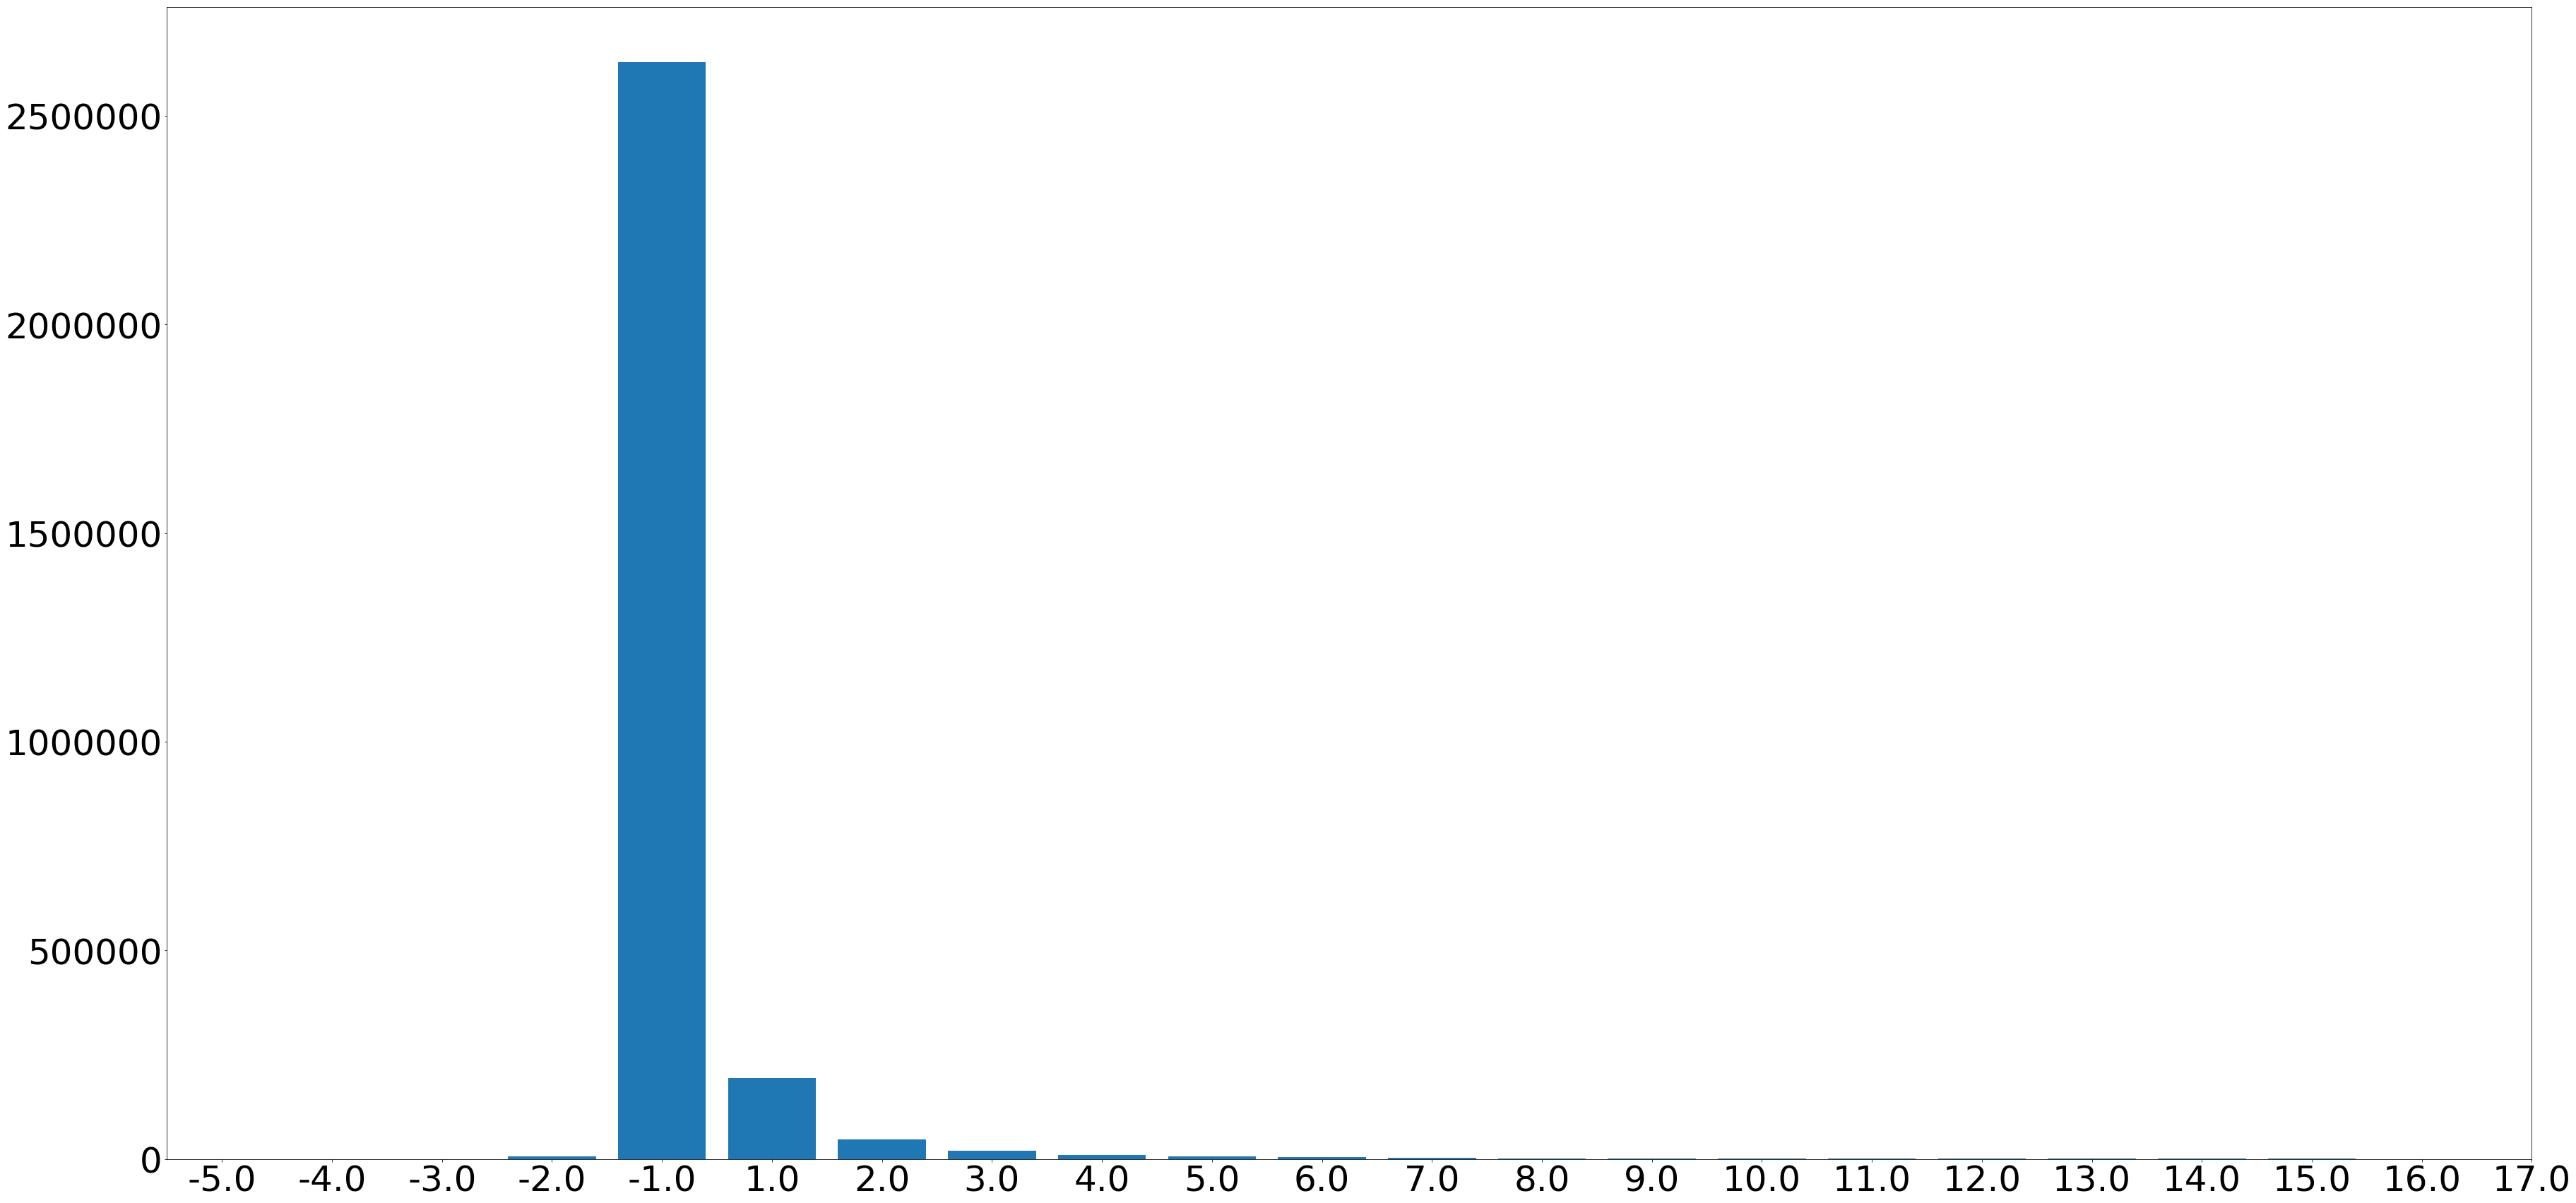

In [29]:
fig = plt.figure()
fig.set_size_inches(60,30)
X=np.arange(198)
plt.bar(X+0, result)
plt.xticks(X+1,result.index,size=50)
plt.yticks(size=50)
plt.xlim(4.5,26)
# plt.ylim(0)
plt.show()

### item_cnt_day의 noise data들을 확인할 수 있는 차트
#### X range (-22,2167), Y range (0,20) >> Y scale 대폭 축소

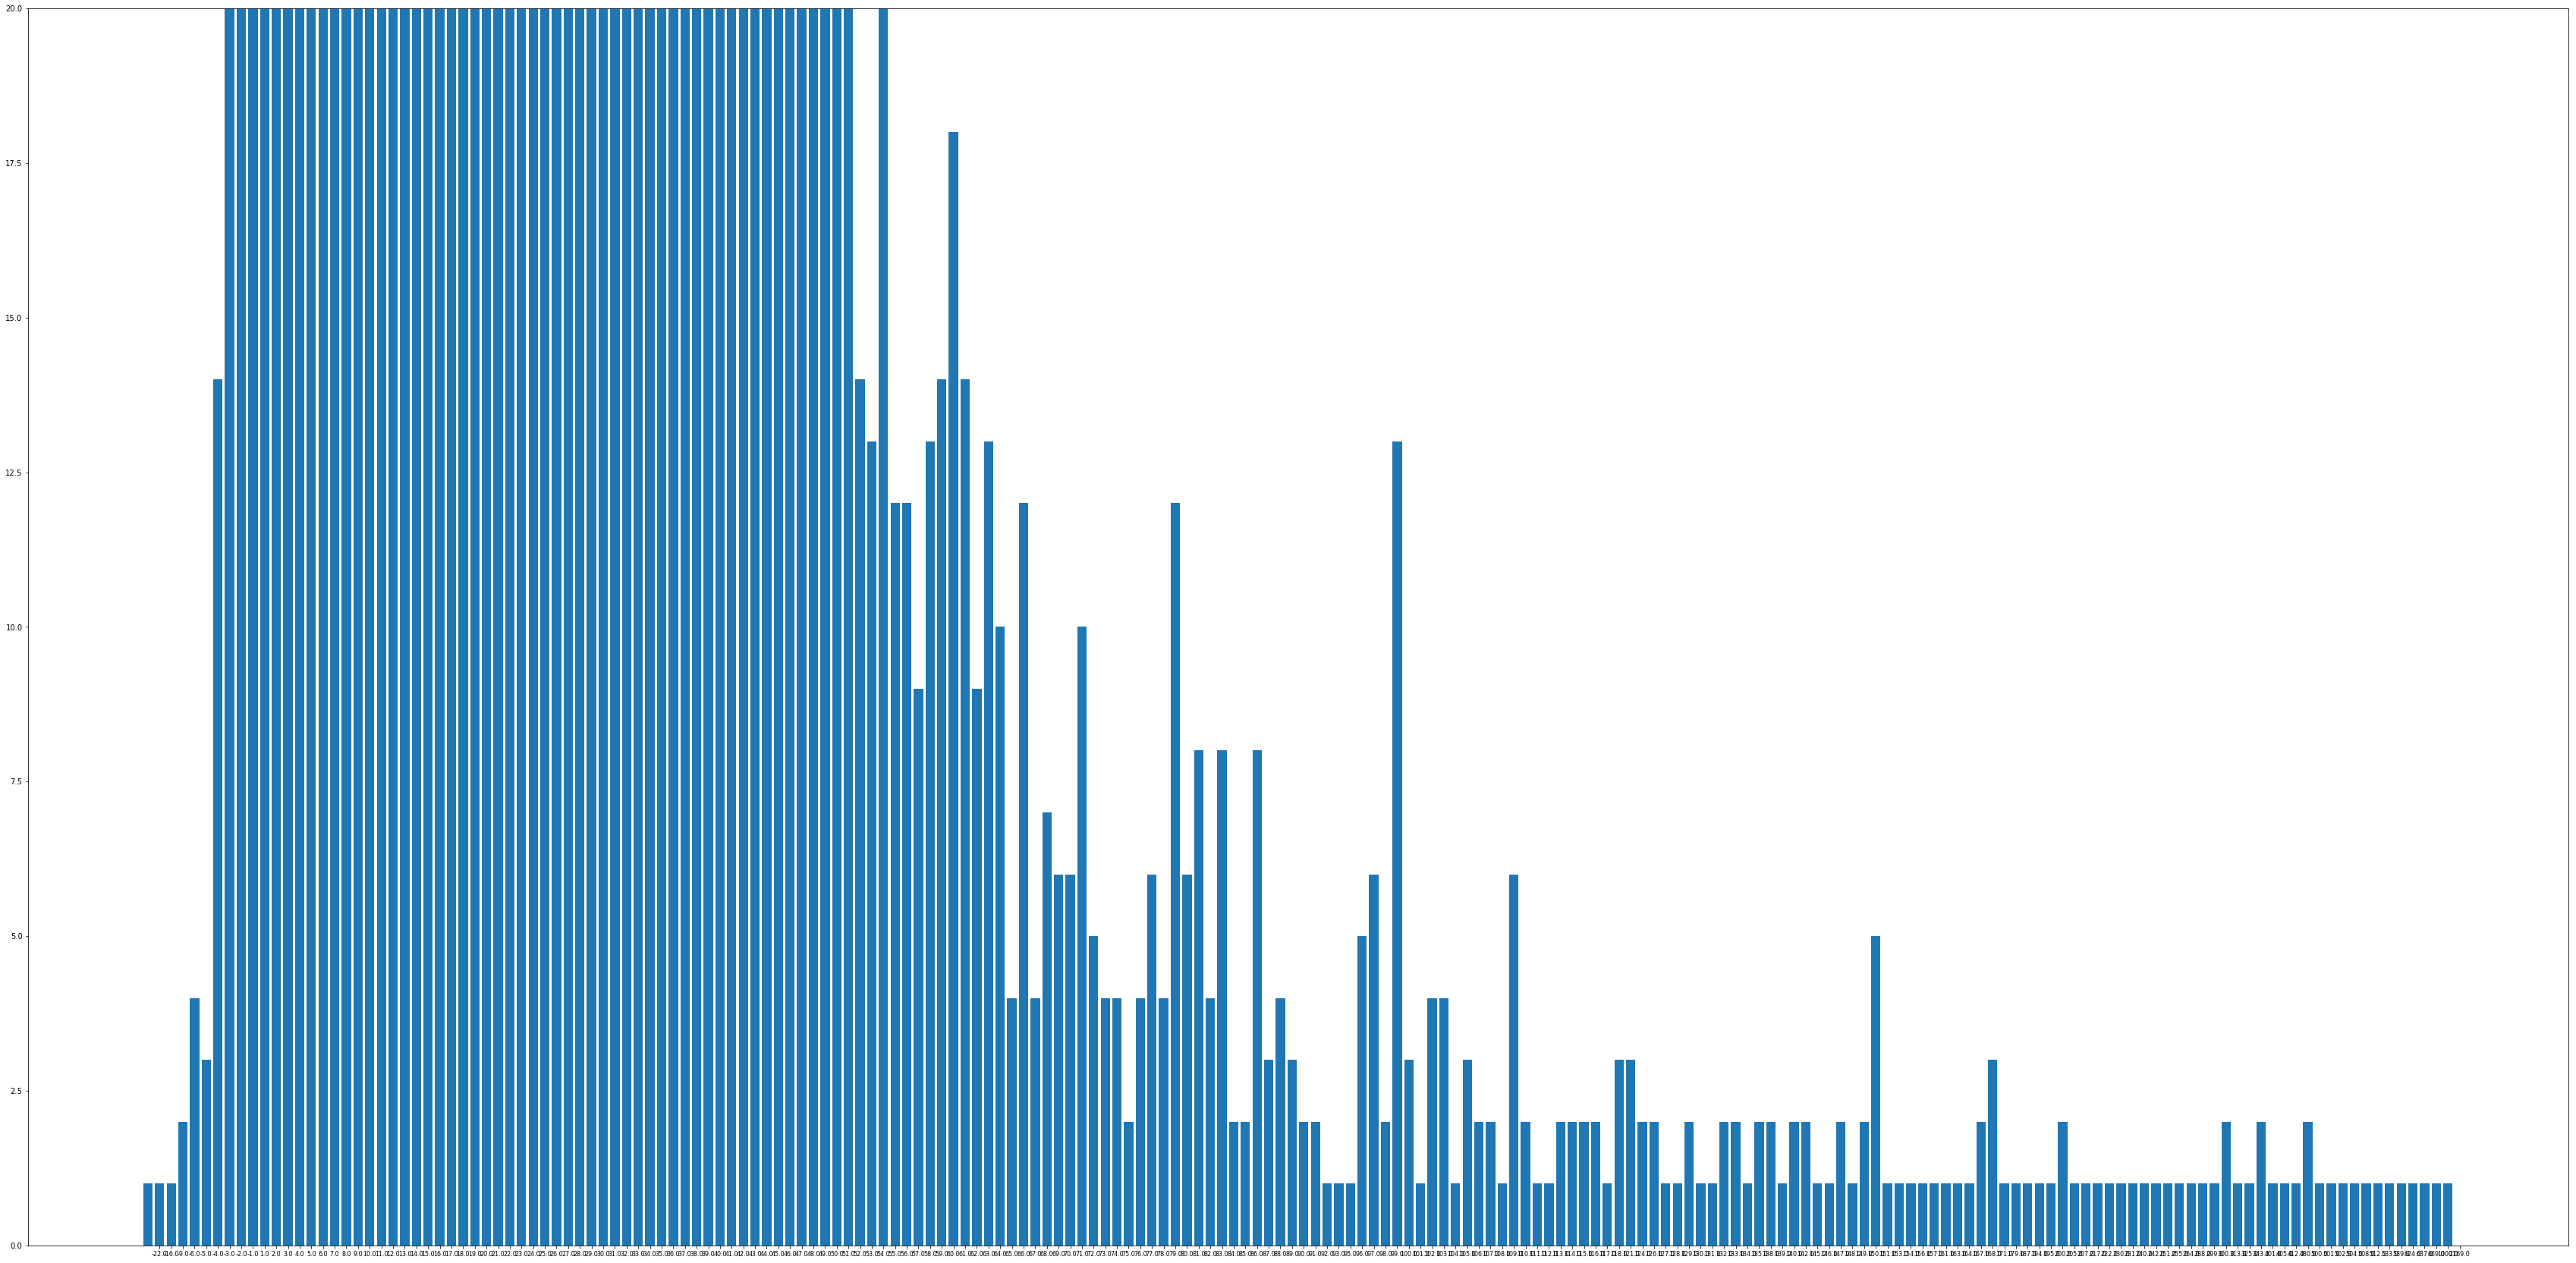

In [30]:
fig = plt.figure()
fig.set_size_inches(60,30)
X=np.arange(198)
plt.bar(X+0, result)
plt.xticks(X+1,result.index,size=8)
plt.yticks(size=10)
# plt.xlim(4.5,26)
plt.ylim(0,20)
plt.show()

## 새로운 Dataframe, noise-term, refund의 세 partician으로
## 데이터를 분류 (item_cnt_day를 기준으로)

In [31]:
df_noise = pd.concat([df_pt_5,df_pt_6,df_pt_7,df_pt_8,df_pt_9,df_pt_10,\
                      df_pt_11,df_pt_12,df_pt_13,df_pt_14,df_pt_15,df_pt_16,\
                      df_pt_17,df_pt_18,df_pt_19,df_pt_20,df_pt_21,df_pt_22,\
                      df_pt_23,df_pt_24,df_pt_25,df_pt_26,df_pt_27,df_pt_28,\
                      df_pt_29,df_pt_30,df_pt_31,df_pt_32,df_pt_33,df_pt_34,\
                      df_pt_35,df_pt_36,df_pt_37,df_pt_38,df_pt_39,df_pt_40,\
                      df_pt_41,df_pt_42,df_pt_43,df_pt_44,df_pt_45,df_pt_46,\
                      df_pt_47,df_pt_48,df_pt_49,df_pt_50,df_pt_51,df_pt_52,\
                      df_pt_53,df_pt_54,df_pt_55,df_pt_56,df_pt_57,df_pt_58,\
                      df_pt_59,df_pt_60,df_pt_61,df_pt_62,df_pt_63,df_pt_64,\
                      df_pt_65,df_pt_66,df_pt_67,df_pt_68,df_pt_69,df_pt_70,\
                      df_pt_71,df_pt_72,df_pt_73,df_pt_74,df_pt_75,df_pt_76,\
                      df_pt_77,df_pt_78,df_pt_79,df_pt_80,df_pt_81,df_pt_82,\
                      df_pt_83,df_pt_84,df_pt_85,df_pt_86,df_pt_87,df_pt_88,\
                      df_pt_89,df_pt_90,df_pt_91,df_pt_92,df_pt_93,df_pt_95,\
                      df_pt_96,df_pt_97,df_pt_98,df_pt_99,df_pt_100,df_pt_101,\
                      df_pt_102,df_pt_103,df_pt_104,df_pt_105,df_pt_106,\
                      df_pt_107,df_pt_108,df_pt_109,df_pt_110,df_pt_111,\
                      df_pt_112,df_pt_113,df_pt_114,df_pt_115,df_pt_116,\
                      df_pt_117,df_pt_118,df_pt_121,df_pt_124,df_pt_126,\
                      df_pt_127,df_pt_128,df_pt_129,df_pt_130,df_pt_131,\
                      df_pt_132,df_pt_133,df_pt_134,df_pt_135,df_pt_138,\
                      df_pt_139,df_pt_140,df_pt_142,df_pt_145,df_pt_146,\
                      df_pt_147,df_pt_148,df_pt_149,df_pt_150,df_pt_151,\
                      df_pt_153,df_pt_154,df_pt_156,df_pt_157,df_pt_161,\
                      df_pt_163,df_pt_164,df_pt_167,df_pt_168,df_pt_171,\
                      df_pt_179,df_pt_187,df_pt_194,df_pt_195,df_pt_200,\
                      df_pt_205,df_pt_207,df_pt_217,df_pt_222,df_pt_230,\
                      df_pt_231,df_pt_240,df_pt_242,df_pt_251,df_pt_255,\
                      df_pt_264,df_pt_288,df_pt_299,df_pt_300,df_pt_313,\
                      df_pt_325,df_pt_343,df_pt_401,df_pt_405,df_pt_412,\
                      df_pt_480,df_pt_500,df_pt_501,df_pt_502,df_pt_504,\
                      df_pt_508,df_pt_512,df_pt_533,df_pt_539,df_pt_624,\
                      df_pt_637,df_pt_669,df_pt_1000,df_pt_2169])
df_new = pd.concat([df_pt_1,df_pt_2,df_pt_3,df_pt_4,])
df_refund = pd.concat([df_pt_m22,df_pt_m16,df_pt_m9,df_pt_m6,df_pt_m5,df_pt_m4,\
                    df_pt_m3,df_pt_m2,df_pt_m1])

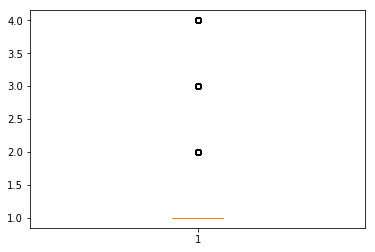

In [32]:
plt.boxplot(df_new["item_cnt_day"])
plt.show()

In [33]:
df_new.head()

,date_block_num,shop_id,item_id,item_price,item_cnt_day,date_test,month
0,0,59,22154,999.00,1.0,2013.01,2
1,0,25,2552,899.00,1.0,2013.01,3
3,0,25,2554,1709.05,1.0,2013.01,6
4,0,25,2555,1099.00,1.0,2013.01,5
5,0,25,2564,349.00,1.0,2013.01,0


In [68]:
train_vlm = df_new.groupby("date_test")["item_cnt_day"].sum()
train_vlmct = df_new.groupby("date_test")["item_cnt_day"].count()
train_max = df_new.groupby("date_test")["item_cnt_day"].mean()
train_new = pd.concat([train_vlm, train_vlmct, train_max],axis=1)
train = train_new.as_matrix()
train_index = df_new["date_test"].unique()
train.shape

(34, 3)

In [69]:
train[:,2]

array([1.11086803, 1.12385753, 1.13536191, 1.10326675, 1.09556491,
       1.10749476, 1.08764964, 1.1085617 , 1.13848465, 1.14612369,
       1.14647935, 1.16305635, 1.11338988, 1.12975763, 1.12447278,
       1.10741971, 1.10299885, 1.10174672, 1.07894737, 1.1084512 ,
       1.13666123, 1.14052764, 1.14710969, 1.16046842, 1.11524569,
       1.10580667, 1.10514066, 1.12244528, 1.10957703, 1.09611857,
       1.08534326, 1.09492235, 1.13738848, 1.12503573])

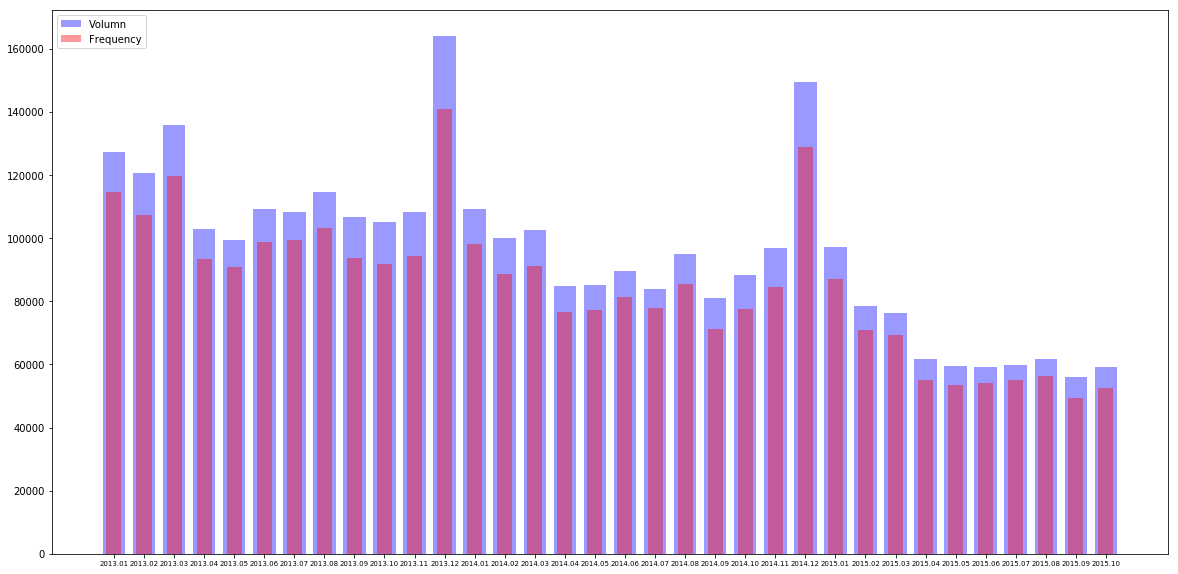

In [35]:
fig = plt.figure()
fig.set_size_inches(20,10)
X=np.arange(34)
plt.bar(X+0, train[:,0],color="b",width=0.75,alpha=0.4, label="Volumn")
plt.bar(X+0, train[:,1],color="r",width=0.50,alpha=0.4, label="Frequency")
plt.xticks(X, train_index, size=7)
plt.legend(loc="upper left")
plt.show()

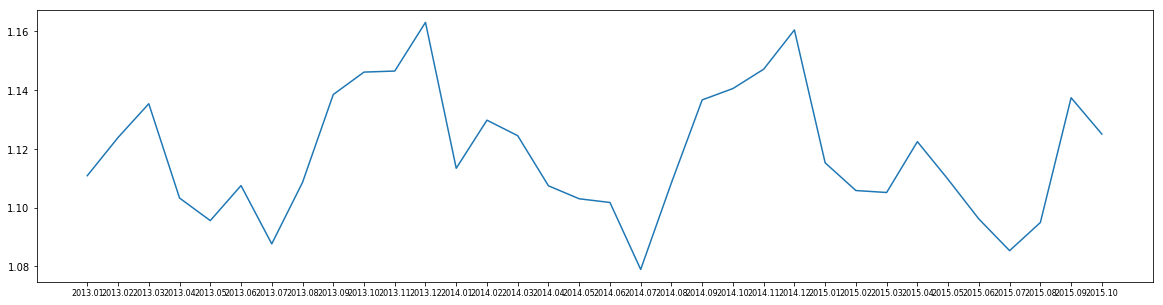

In [64]:
fig = plt.figure()
fig.set_size_inches(20,5)
plt.plot(X,train[:,2])
plt.xticks(X, train_index, size=8)
plt.show()

In [66]:
train[:,2]

array([1.11086803, 1.12385753, 1.13536191, 1.10326675, 1.09556491,
       1.10749476, 1.08764964, 1.1085617 , 1.13848465, 1.14612369,
       1.14647935, 1.16305635, 1.11338988, 1.12975763, 1.12447278,
       1.10741971, 1.10299885, 1.10174672, 1.07894737, 1.1084512 ,
       1.13666123, 1.14052764, 1.14710969, 1.16046842, 1.11524569,
       1.10580667, 1.10514066, 1.12244528, 1.10957703, 1.09611857,
       1.08534326, 1.09492235, 1.13738848, 1.12503573])

In [67]:
train

array([[1.27451000e+05, 1.14731000e+05, 1.11086803e+00],
       [1.20627000e+05, 1.07333000e+05, 1.12385753e+00],
       [1.35854000e+05, 1.19657000e+05, 1.13536191e+00],
       [1.02905000e+05, 9.32730000e+04, 1.10326675e+00],
       [9.94510000e+04, 9.07760000e+04, 1.09556491e+00],
       [1.09364000e+05, 9.87490000e+04, 1.10749476e+00],
       [1.08207000e+05, 9.94870000e+04, 1.08764964e+00],
       [1.14602000e+05, 1.03379000e+05, 1.10856170e+00],
       [1.06865000e+05, 9.38660000e+04, 1.13848465e+00],
       [1.05260000e+05, 9.18400000e+04, 1.14612369e+00],
       [1.08293000e+05, 9.44570000e+04, 1.14647935e+00],
       [1.64027000e+05, 1.41031000e+05, 1.16305635e+00],
       [1.09336000e+05, 9.82010000e+04, 1.11338988e+00],
       [1.00031000e+05, 8.85420000e+04, 1.12975763e+00],
       [1.02643000e+05, 9.12810000e+04, 1.12447278e+00],
       [8.50000000e+04, 7.67550000e+04, 1.10741971e+00],
       [8.52210000e+04, 7.72630000e+04, 1.10299885e+00],
       [8.97560000e+04, 8.14670

## 이상수치 제거 결과, 소폭의 변화는 확인할 수 있으나 item_cnt_day의 값이 1인 빈도수가 298만 raw instance 중  263만에 육박하므로 소량 조정해준 정도의 의미만을 가지는 것으로 생각된다.

## Next, 가설설정

In [37]:
df_refund.head()

,date_block_num,shop_id,item_id,item_price,item_cnt_day,date_test,month
1057907,10,12,8023,15.000000,-22.0,2013.11,2
1835454,18,14,20949,5.000000,-16.0,2014.07,0
2048519,21,12,9242,1433.333333,-9.0,2014.10,0
59156,0,12,1590,2599.000000,-6.0,2013.01,8
940092,9,42,3732,2599.000000,-6.0,2013.10,9


In [38]:
df_new.head()

,date_block_num,shop_id,item_id,item_price,item_cnt_day,date_test,month
0,0,59,22154,999.00,1.0,2013.01,2
1,0,25,2552,899.00,1.0,2013.01,3
3,0,25,2554,1709.05,1.0,2013.01,6
4,0,25,2555,1099.00,1.0,2013.01,5
5,0,25,2564,349.00,1.0,2013.01,0


In [39]:
df_noise.head()

,date_block_num,shop_id,item_id,item_price,item_cnt_day,date_test,month
252,0,25,3432,599.0,5.0,2013.01,2
353,0,25,2973,2499.0,5.0,2013.01,6
405,0,25,2972,599.0,5.0,2013.01,6
421,0,25,3186,419.3,5.0,2013.01,6
1617,0,25,3321,1999.0,5.0,2013.01,3


In [44]:
df_refund.shape[0]

7356

In [45]:
df_new.shape[0]

2890608

In [46]:
df_noise.shape[0]

37885

### 일 판매량에 따라 분류를 하였을 때, 세 Subgroup 간에 item_price가 차이나는 것을 확인할 수 있다. 이미 Promotion 가설에 따른 진행을 하고 있기 때문에 자료만 upload하고 다른 측면으로 접근하겠다.

In [279]:
df_refund["item_price"].mean()

1442.945622620989

In [282]:
df_new["item_price"].mean()

887.0302558913785

In [283]:
df_noise["item_price"].mean()

1075.346718795302

In [290]:
items = items_df.drop("item_name",axis=1)
items.head()

,item_id,item_category_id
0,0,40
1,1,76
2,2,40
3,3,40
4,4,40
